# **Confusion matrix & k-fold cross validation: DT, random forest, NB, and Perceptron**:

In [1]:
#First, import the important libraries:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.svm import SVC
import numpy as np #It is a numeric python module which provides fast maths functions for calculations.
import pandas as pd #Used to read and write different files.
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import preprocessing


In [2]:
#Second, connect to Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Step1:Create dataset
data = pd.read_csv("/content/drive/My Drive/DT/healthcare-dataset-stroke-data.csv")
#The goal of this database is to classify cells according to information to the malignant cells and benign cells 
#look at top 5 rows in data set
data.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
#get the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
##Delete first column /  Deleting the unimportant features during the prediction process
data=data.drop(['id'], axis = 1)


In [6]:
#is there any missing values?
data.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


# **It shows that there's two missing values in (BMI) column, there're many technigues to handel missing values, we can simply delete them, because it won't abortives the result.**


In [7]:
#Removing the missing values (NaN)
data=data.dropna() 

#**We can see that there's non numerical coulmns. Decision trees works with categorical (non-numerical) data but it should be convert to integers first. So, we have to convert the non numerical columns: Gender, Ever married, work type, Residence type, and smoking_status into numerical values**


In [8]:
le=preprocessing.LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['ever_married']=le.fit_transform(data['ever_married'])
data['work_type']=le.fit_transform(data['work_type'])
data['Residence_type']=le.fit_transform(data['Residence_type'])
data['smoking_status']=le.fit_transform(data['smoking_status'])
#to check if i convert the (string) to (float) 
data.head(10)




<ipython-input-8-64b75c752621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender']=le.fit_transform(data['gender'])
<ipython-input-8-64b75c752621>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ever_married']=le.fit_transform(data['ever_married'])
<ipython-input-8-64b75c752621>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,0,81.0,1,0,1,2,0,80.43,29.7,2,1
11,0,61.0,0,1,1,0,0,120.46,36.8,3,1


In [9]:
x = data.drop(columns="stroke") #Features

y = data["stroke"] #target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #we use to split up 20% of the data in to the test set and 80% for training.

# **1-Decision tree**

In [11]:

clf = DecisionTreeClassifier(criterion="entropy")
#max_depth
#criterion{“gini”, “entropy”}, default=”gini”
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Training Accuracy: {}'.format(accuracy_score(y_train, y_pred)))

Training Accuracy: 1.0


In [12]:

y_pred = clf.predict(X_test)
print('Testing Accuracy: {}'.format(accuracy_score(y_test,y_pred)))
print ("precision score: {}".format(precision_score(y_test, y_pred)))
print ("recall score: {}".format(recall_score(y_test, y_pred)))
print ("F 1 score: {}".format(f1_score(y_test, y_pred)))



Testing Accuracy: 0.9307535641547862
precision score: 0.23404255319148937
recall score: 0.2558139534883721
F 1 score: 0.24444444444444444


# **(k-fold cross validation / DT)**

In [13]:
print('-----Accuracy testing after cross-validation----')
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print('mean scoore for testing accuracy:\n:', meanScore)

###
print('\n-----Accuracy training afyer cross-validation-----')
scores0 = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
print(scores0)
meanScore0 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore0)

###
print('\n-----precision score:after cross validation------')
scores1 = cross_val_score(clf, x, y, cv=5, scoring="precision")
print(scores1)
meanScore1 = scores1.mean()
print('mean scoore for precision\n:', meanScore1)

###
print('\n-----recall score :after cross validation------')
scores2 = cross_val_score(clf, x, y, cv=5, scoring="recall")
print(scores2)
meanScore2 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore2)

###
print('\n-----f1 score: after cross validation------')
scores3 = cross_val_score(clf, x, y, cv=5, scoring="f1")
print(scores3)
meanScore3 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore3)


-----Accuracy testing after cross-validation----
[0.91370558 0.9035533  0.95408163 0.90306122 0.93877551]
mean scoore for testing accuracy:
: 0.9226354501191338

-----Accuracy training afyer cross-validation-----
[0.91984733 0.92620865 0.91847134 0.91592357 0.92866242]
mean scoore for testing accuracy:
: 0.9218226608969061

-----precision score:after cross validation------
[0.10204082 0.09615385 0.1372549  0.22727273 0.09302326]
mean scoore for precision
: 0.13114910950556835

-----recall score :after cross validation------
[0.0952381  0.16666667 0.14285714 0.23809524 0.07317073]
mean scoore for testing accuracy:
: 0.9218226608969061

-----f1 score: after cross validation------
[0.10989011 0.14285714 0.16494845 0.22222222 0.05263158]
mean scoore for testing accuracy:
: 0.9218226608969061


# **(Confiusion matrix / DT)`**

In [14]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[903  36]
 [ 32  11]]


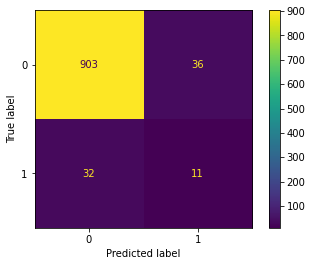

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))
disp.plot()

# **Extra: Drawing the Decision tree** 

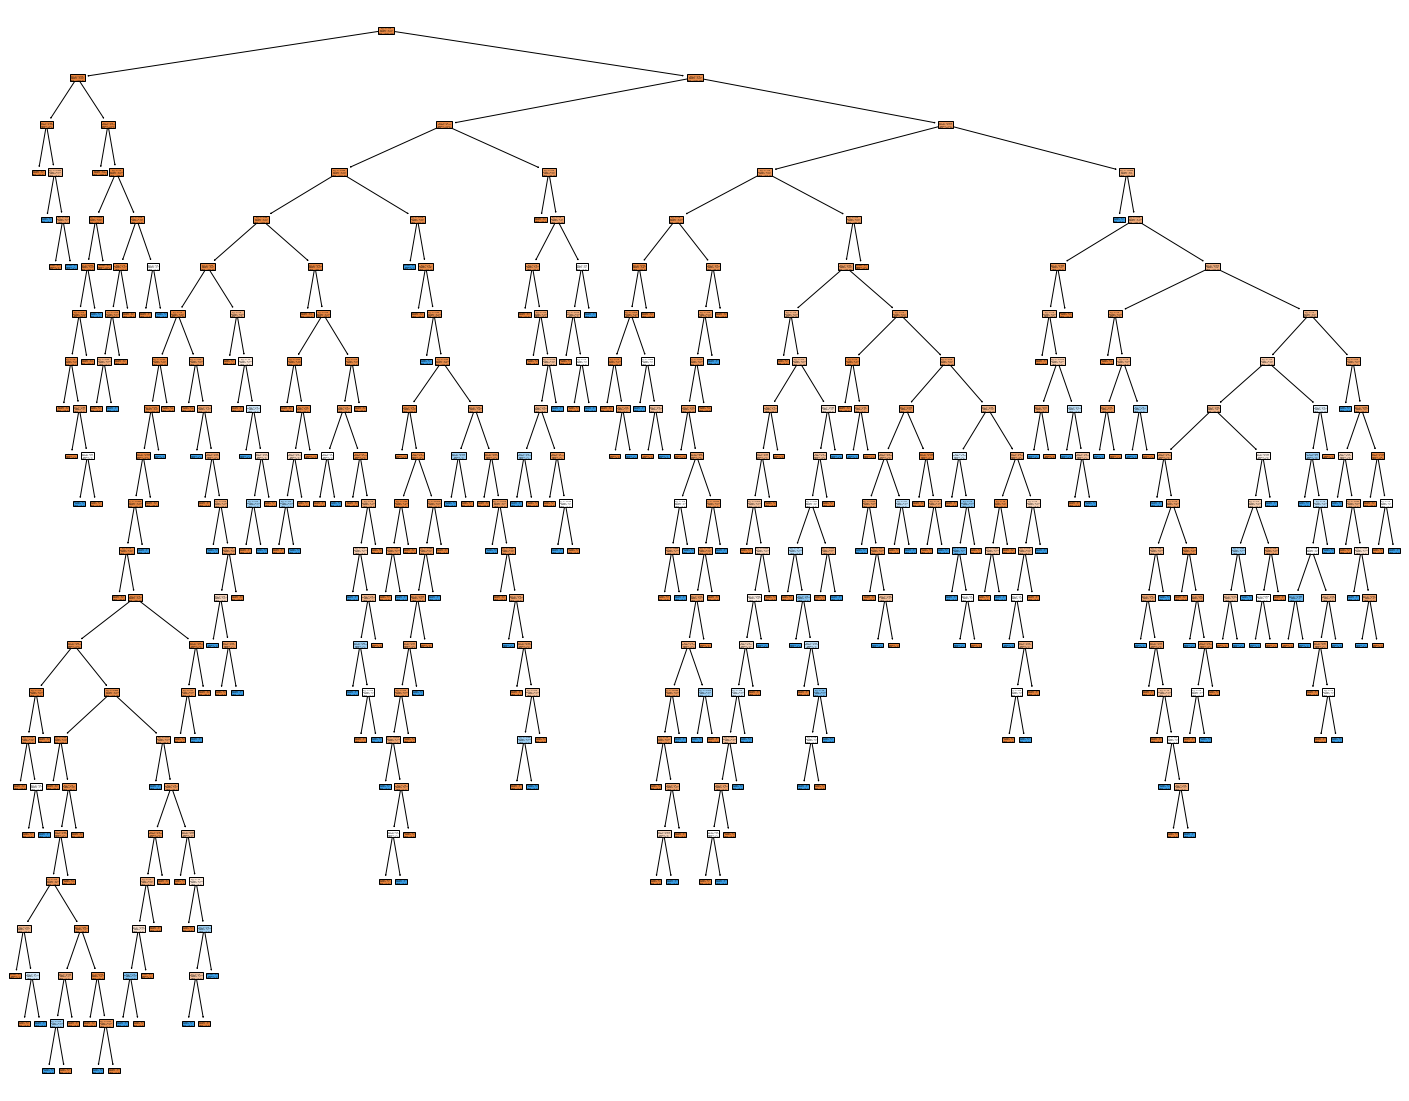

In [16]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)
plt.show()

# **2- Random Forest**

In [17]:
clf2 = RandomForestClassifier(n_estimators=8, random_state=0)
#n_estimators int, default=100 The number of trees in the forest.
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_train)
print('Training Accuracy: {}'.format(accuracy_score(y_train, y_pred)))



Training Accuracy: 0.9893048128342246


In [18]:

y_pred = clf2.predict(X_test)
print('Testing Accuracy: {}'.format(accuracy_score(y_test,y_pred)))
print ("precision score: {}".format(precision_score(y_test, y_pred)))
print ("recall score: {}".format(recall_score(y_test, y_pred)))
print ("F 1 score: {}".format(f1_score(y_test, y_pred)))



Testing Accuracy: 0.9531568228105907
precision score: 0.0
recall score: 0.0
F 1 score: 0.0


# **(k-fold cross validation / Random forest)**





In [19]:
print('-----Accuracy testing after cross-validation----')
scores = cross_val_score(clf2, X_test, y_test, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print('mean scoore for testing accuracy:\n:', meanScore)

###
print('\n-----Accuracy training afyer cross-validation-----')
scores0 = cross_val_score(clf2, X_train, y_train, cv=5, scoring="accuracy")
print(scores0)
meanScore0 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore0)

###
print('\n-----precision score:after cross validation------')
scores1 = cross_val_score(clf2, x, y, cv=5, scoring="precision")
print(scores1)
meanScore1 = scores1.mean()
print('mean scoore for precision\n:', meanScore1)

###
print('\n-----recall score :after cross validation------')
scores2 = cross_val_score(clf2, x, y, cv=5, scoring="recall")
print(scores2)
meanScore2 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore2)

###
print('\n-----f1 score: after cross validation------')
scores3 = cross_val_score(clf2, x, y, cv=5, scoring="f1")
print(scores3)
meanScore3 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore3)


-----Accuracy testing after cross-validation----
[0.94923858 0.95431472 0.95918367 0.95918367 0.94897959]
mean scoore for testing accuracy:
: 0.9541800476535791

-----Accuracy training afyer cross-validation-----
[0.95419847 0.95165394 0.95286624 0.9566879  0.9566879 ]
mean scoore for testing accuracy:
: 0.9544188911038718

-----precision score:after cross validation------
[0.         0.         0.         0.28571429 0.        ]
mean scoore for precision
: 0.05714285714285714

-----recall score :after cross validation------
[0.         0.         0.         0.04761905 0.        ]
mean scoore for testing accuracy:
: 0.9544188911038718

-----f1 score: after cross validation------
[0.         0.         0.         0.08163265 0.        ]
mean scoore for testing accuracy:
: 0.9544188911038718


# **(Confiusion matrix / Random forest)**




In [20]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[936   3]
 [ 43   0]]


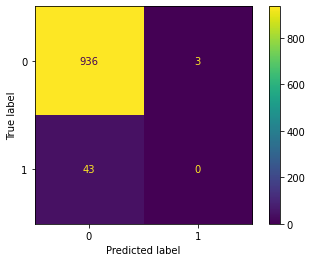

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))
disp.plot()

# **3- naive bayes (NB)**

In [22]:
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred = clf2.predict(X_train)
print('Training Accuracy: {}'.format(accuracy_score(y_train, y_pred)))

Training Accuracy: 0.9893048128342246


In [23]:
y_pred = clf3.predict(X_test)
print('Testing Accuracy: {}'.format(accuracy_score(y_test,y_pred)))
print ("precision score: {}".format(precision_score(y_test, y_pred)))
print ("recall score: {}".format(recall_score(y_test, y_pred)))
print ("F 1 score: {}".format(f1_score(y_test, y_pred)))


Testing Accuracy: 0.8645621181262729
precision score: 0.1590909090909091
recall score: 0.4883720930232558
F 1 score: 0.24


# **(k-fold cross validation / NB)**

In [24]:
print('-----Accuracy testing after cross-validation----')
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print('mean scoore for testing accuracy:\n:', meanScore)

###
print('\n-----Accuracy training afyer cross-validation-----')
scores0 = cross_val_score(clf3, X_train, y_train, cv=5, scoring="accuracy")
print(scores0)
meanScore0 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore0)

###
print('\n-----precision score:after cross validation------')
scores1 = cross_val_score(clf3, x, y, cv=5, scoring="precision")
print(scores1)
meanScore1 = scores1.mean()
print('mean scoore for precision\n:', meanScore1)

###
print('\n-----recall score :after cross validation------')
scores2 = cross_val_score(clf3, x, y, cv=5, scoring="recall")
print(scores2)
meanScore2 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore2)

###
print('\n-----f1 score: after cross validation------')
scores3 = cross_val_score(clf3, x, y, cv=5, scoring="f1")
print(scores3)
meanScore3 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore3)


-----Accuracy testing after cross-validation----
[0.91370558 0.89847716 0.93877551 0.89795918 0.93367347]
mean scoore for testing accuracy:
: 0.9165181808764113

-----Accuracy training afyer cross-validation-----
[0.86386768 0.87913486 0.87006369 0.85605096 0.88535032]
mean scoore for testing accuracy:
: 0.8708935025364255

-----precision score:after cross validation------
[0.17424242 0.1640625  0.14285714 0.11666667 0.11827957]
mean scoore for precision
: 0.1432216607317414

-----recall score :after cross validation------
[0.54761905 0.5        0.4047619  0.33333333 0.26829268]
mean scoore for testing accuracy:
: 0.8708935025364255

-----f1 score: after cross validation------
[0.26436782 0.24705882 0.21118012 0.17283951 0.1641791 ]
mean scoore for testing accuracy:
: 0.8708935025364255


# **(Confiusion matrix / NB)**


In [25]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[828 111]
 [ 22  21]]


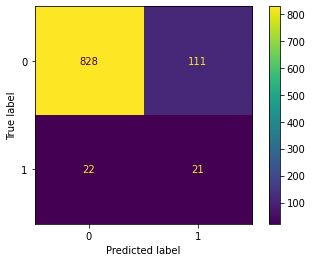

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))
disp.plot()

4-

In [27]:
clf4= Perceptron()

clf4.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Training Accuracy: {}'.format(accuracy_score(y_train, y_pred)))

Training Accuracy: 1.0


In [28]:

y_pred = clf4.predict(X_test)
print('Testing Accuracy: {}'.format(accuracy_score(y_test,y_pred)))
print ("precision score: {}".format(precision_score(y_test, y_pred)))
print ("recall score: {}".format(recall_score(y_test, y_pred)))
print ("F 1 score: {}".format(f1_score(y_test, y_pred)))



Testing Accuracy: 0.9541751527494908
precision score: 0.0
recall score: 0.0
F 1 score: 0.0


# **(k-fold cross validation / Perceptron)**


In [29]:
print('-----Accuracy testing after cross-validation----')
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print('mean scoore for testing accuracy:\n:', meanScore)

###
print('\n-----Accuracy training afyer cross-validation-----')
scores0 = cross_val_score(clf4, X_train, y_train, cv=5, scoring="accuracy")
print(scores0)
meanScore0 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore0)

###
print('\n-----precision score:after cross validation------')
scores1 = cross_val_score(clf4, x, y, cv=5, scoring="precision")
print(scores1)
meanScore1 = scores1.mean()
print('mean scoore for precision\n:', meanScore1)

###
print('\n-----recall score :after cross validation------')
scores2 = cross_val_score(clf4, x, y, cv=5, scoring="recall")
print(scores2)
meanScore2 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore2)

###
print('\n-----f1 score: after cross validation------')
scores3 = cross_val_score(clf4, x, y, cv=5, scoring="f1")
print(scores3)
meanScore3 = scores0.mean()
print('mean scoore for testing accuracy:\n:', meanScore3)


-----Accuracy testing after cross-validation----
[0.91370558 0.9035533  0.93367347 0.89795918 0.93877551]
mean scoore for testing accuracy:
: 0.9175334093028074

-----Accuracy training afyer cross-validation-----
[0.95801527 0.956743   0.95796178 0.95796178 0.94904459]
mean scoore for testing accuracy:
: 0.9559452845172688

-----precision score:after cross validation------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

[0. 0. 0. 0. 0.]
mean scoore for precision
: 0.0

-----recall score :after cross validation------
[0. 0. 0. 0. 0.]
mean scoore for testing accuracy:
: 0.9559452845172688

-----f1 score: after cross validation------
[0. 0. 0. 0. 0.]
mean scoore for testing accuracy:
: 0.9559452845172688


# **(Confiusion matrix / Perceptron)**


In [30]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[937   2]
 [ 43   0]]


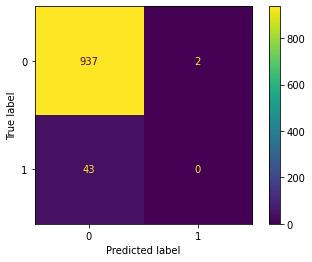

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))
disp.plot()